All Regresion Models Codes in a nut shell

In [ ]:
# Importing all necessry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Read the file 
df = pd.read_csv('ASP_07-2019_09-2022.csv',delimiter=',')

In [ ]:
df.head()

,Time,GHI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG
0,01-07-2019 00:00,-1.251141,226.046751,0.270745,4.599429,49.373845
1,01-07-2019 01:00,-1.105491,231.856001,0.438133,3.880017,50.883139
2,01-07-2019 02:00,-1.110939,235.262640,0.391107,3.119183,53.990385
3,01-07-2019 03:00,-0.995637,246.829333,0.444790,3.146530,54.673470
4,01-07-2019 04:00,-1.001849,249.490834,0.454146,5.106388,48.845702


In [ ]:
train_dates = pd.to_datetime(df['Time'])

In [ ]:
df.shape

(27814, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27814 entries, 0 to 27813
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      27814 non-null  object 
 1   GHI_AVG   25842 non-null  float64
 2   WDIR_AVG  25862 non-null  float64
 3   WSPD_AVG  25862 non-null  float64
 4   TEMP_AVG  25842 non-null  float64
 5   HUM_AVG   25842 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,GHI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG
count,25842.000000,25862.000000,25862.000000,25842.000000,25842.000000
mean,261.468428,174.375229,1.387683,21.421420,38.827830
std,350.681499,75.842099,4.423161,9.321068,22.312720
min,-6.350522,0.000000,0.000000,-4.173657,4.267947
25%,-0.636510,120.128723,0.383897,14.878512,21.659492
50%,6.630593,161.872111,1.150318,21.852783,33.345202
75%,548.069702,243.611076,2.155054,28.335655,51.553219
max,1170.911090,700.014391,652.826218,44.854888,99.932081


In [ ]:
df.dtypes

Time         object
GHI_AVG     float64
WDIR_AVG    float64
WSPD_AVG    float64
TEMP_AVG    float64
HUM_AVG     float64
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates()

,Time,GHI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG
0,01-07-2019 00:00,-1.251141,226.046751,0.270745,4.599429,49.373845
1,01-07-2019 01:00,-1.105491,231.856001,0.438133,3.880017,50.883139
2,01-07-2019 02:00,-1.110939,235.262640,0.391107,3.119183,53.990385
3,01-07-2019 03:00,-0.995637,246.829333,0.444790,3.146530,54.673470
4,01-07-2019 04:00,-1.001849,249.490834,0.454146,5.106388,48.845702
...,...,...,...,...,...,...
27809,01-09-2022 17:00,28.101389,145.524306,1.942893,12.795519,95.269921
27810,01-09-2022 18:00,0.883333,136.775139,1.787685,12.445601,98.542388
27811,01-09-2022 19:00,0.000000,135.269583,2.099801,11.979293,99.854972
27812,01-09-2022 20:00,0.000000,129.577778,0.919404,11.599545,99.721071


In [ ]:
df.interpolate(method="linear")

,Time,GHI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG
0,01-07-2019 00:00,-1.251141,226.046751,0.270745,4.599429,49.373845
1,01-07-2019 01:00,-1.105491,231.856001,0.438133,3.880017,50.883139
2,01-07-2019 02:00,-1.110939,235.262640,0.391107,3.119183,53.990385
3,01-07-2019 03:00,-0.995637,246.829333,0.444790,3.146530,54.673470
4,01-07-2019 04:00,-1.001849,249.490834,0.454146,5.106388,48.845702
...,...,...,...,...,...,...
27809,01-09-2022 17:00,28.101389,145.524306,1.942893,12.795519,95.269921
27810,01-09-2022 18:00,0.883333,136.775139,1.787685,12.445601,98.542388
27811,01-09-2022 19:00,0.000000,135.269583,2.099801,11.979293,99.854972
27812,01-09-2022 20:00,0.000000,129.577778,0.919404,11.599545,99.721071


In [ ]:
#Filling missing values
df.fillna(method='bfill', inplace=True)  

In [ ]:
df.isnull().sum()

Time        0
GHI_AVG     0
WDIR_AVG    0
WSPD_AVG    0
TEMP_AVG    0
HUM_AVG     0
dtype: int64

In [ ]:
df.rename(columns={'GHI_AVG':'GHI','WDIR_AVG':'WDIR','WSPD_AVG':'WSPD','TEMP_AVG':'TEMP','HUM_AVG':'HUM'})
df.head()

,Time,GHI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG
0,01-07-2019 00:00,-1.251141,226.046751,0.270745,4.599429,49.373845
1,01-07-2019 01:00,-1.105491,231.856001,0.438133,3.880017,50.883139
2,01-07-2019 02:00,-1.110939,235.262640,0.391107,3.119183,53.990385
3,01-07-2019 03:00,-0.995637,246.829333,0.444790,3.146530,54.673470
4,01-07-2019 04:00,-1.001849,249.490834,0.454146,5.106388,48.845702


In [ ]:
# Univariate Analysis

In [ ]:
# sns.pairplot(df)
# plt.show()

In [ ]:
# df.hist(figsize=(8,6),color='blue')
# plt.show()

Bivariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27814 entries, 0 to 27813
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      27814 non-null  object 
 1   GHI_AVG   27814 non-null  float64
 2   WDIR_AVG  27814 non-null  float64
 3   WSPD_AVG  27814 non-null  float64
 4   TEMP_AVG  27814 non-null  float64
 5   HUM_AVG   27814 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB


In [ ]:
# i = 1
# plt.figure(figsize=(18,18))
# for col in df.columns:
#     plt.subplot(4,3,i)
#     sns.scatterplot(data=df,x='Time',y=col)
#     i+=1

In [ ]:
#sns.scatterplot(y='GHI_AVG',x='TEMP_AVG',hue='WSPD_AVG',size='16',data=df,sizes=(50,300))

Multivariate Analysis

In [ ]:
corr=df.corr()
corr

,GHI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG
GHI_AVG,1.000000,-0.301827,0.149154,0.439487,-0.402059
WDIR_AVG,-0.301827,1.000000,-0.032940,-0.165660,0.159764
WSPD_AVG,0.149154,-0.032940,1.000000,0.121324,-0.066482
TEMP_AVG,0.439487,-0.165660,0.121324,1.000000,-0.614641
HUM_AVG,-0.402059,0.159764,-0.066482,-0.614641,1.000000


<AxesSubplot:>

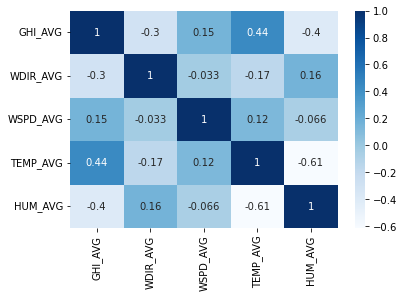

In [ ]:
sns.heatmap(corr,annot=True,cmap='Blues')

In [ ]:
print(df.isnull().sum())

Time        0
GHI_AVG     0
WDIR_AVG    0
WSPD_AVG    0
TEMP_AVG    0
HUM_AVG     0
dtype: int64


In [ ]:
X_cols=['WDIR_AVG','WSPD_AVG','TEMP_AVG','HUM_AVG']

for column in X_cols:
    df[column]+=1
    df[column]=np.log(df[column])
df.var()

GHI_AVG     126069.238757
WDIR_AVG         1.551952
WSPD_AVG         0.200896
TEMP_AVG         0.343382
HUM_AVG          0.335015
dtype: float64

In [ ]:
print(df.isnull().sum())

Time         0
GHI_AVG      0
WDIR_AVG     0
WSPD_AVG     0
TEMP_AVG    71
HUM_AVG      0
dtype: int64


In [ ]:
df.dropna(inplace=True)
print("Nan Values removed")
print(df.isnull().sum())

Nan Values removed
Time        0
GHI_AVG     0
WDIR_AVG    0
WSPD_AVG    0
TEMP_AVG    0
HUM_AVG     0
dtype: int64


In [ ]:
cols=['WDIR_AVG','WSPD_AVG','TEMP_AVG','HUM_AVG']
X= df[cols]
Y=df[['GHI_AVG']]
X.var()

WDIR_AVG    1.549581
WSPD_AVG    0.200837
TEMP_AVG    0.343382
HUM_AVG     0.333738
dtype: float64

In [ ]:
print(X.isnull().sum())

WDIR_AVG    0
WSPD_AVG    0
TEMP_AVG    0
HUM_AVG     0
dtype: int64


In [ ]:
# for column in X.columns:
#     X[column]+=1
#     X[column]=np.log(X[column])
# X.var()

In [ ]:
print(X.isnull().sum())

WDIR_AVG    0
WSPD_AVG    0
TEMP_AVG    0
HUM_AVG     0
dtype: int64


In [ ]:
print(X.shape)
print(Y.shape)
X.head()

(27743, 4)
(27743, 1)


,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG
0,5.425156,0.239603,1.722665,3.919472
1,5.450420,0.363346,1.585149,3.948994
2,5.464944,0.330100,1.415655,4.007158
3,5.512740,0.367964,1.422272,4.019504
4,5.523422,0.374418,1.809335,3.908932


In [ ]:
#Some modification is required on Y data
Y.tail()

,GHI_AVG
27809,28.101389
27810,0.883333
27811,0.000000
27812,0.000000
27813,0.000000


In [ ]:
X.isnull().values.any()

False

In [ ]:
X

,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG
0,5.425156,0.239603,1.722665,3.919472
1,5.450420,0.363346,1.585149,3.948994
2,5.464944,0.330100,1.415655,4.007158
3,5.512740,0.367964,1.422272,4.019504
4,5.523422,0.374418,1.809335,3.908932
...,...,...,...,...
27809,4.987191,1.079393,2.624344,4.567156
27810,4.925623,1.025211,2.598652,4.600584
27811,4.914635,1.131338,2.563355,4.613684
27812,4.871969,0.652015,2.533661,4.612355


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
#J=imputer.fit(x_train,y_train)
imputer.fit_transform(X)

array([[5.42515595, 0.23960312, 1.72266468, 3.91947209],
       [5.45042024, 0.36334598, 1.58514878, 3.94899387],
       [5.46494407, 0.33009959, 1.41565475, 4.00715836],
       ...,
       [4.91463515, 1.13133804, 2.56335521, 4.61368356],
       [4.87196905, 0.65201481, 2.53366072, 4.61235502],
       [4.98995628, 0.55354981, 2.51898476, 4.61392208]])

In [ ]:
print(X.isnull().values.any())
print(X.isnull().sum())

False
WDIR_AVG    0
WSPD_AVG    0
TEMP_AVG    0
HUM_AVG     0
dtype: int64


In [ ]:
print(Y.isnull().values.any())
print(Y.isnull().sum())

False
GHI_AVG    0
dtype: int64


In [ ]:
# X.dropna(inplace=True)
# print("Nan Values removed")
# print(X.isnull().sum())

Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

In [ ]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (22194, 4)
x_test_shape: (5549, 4)
y_train_shape: (22194, 1)
y_test_shape: (5549, 1)


In [ ]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler(feature_range=(0,1))
#scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train,x_test

(array([[0.85555609, 0.04220291, 0.91391397, 0.67158159],
        [0.78804932, 0.07985917, 0.91076532, 0.67567175],
        [0.73585829, 0.17561116, 0.94768581, 0.55336178],
        ...,
        [0.86309354, 0.20014689, 0.97522054, 0.66496305],
        [0.78358174, 0.09806469, 0.95471046, 0.49587513],
        [0.81466071, 0.14553919, 0.98337976, 0.39690941]]),
 array([[0.85088677, 0.11101039, 0.9796739 , 0.25937912],
        [0.7704239 , 0.05319271, 0.94501657, 0.58368781],
        [0.86315583, 0.04787046, 0.87464687, 0.74303838],
        ...,
        [0.        , 0.        , 0.78180531, 0.90251833],
        [0.69842231, 0.17090521, 0.94188676, 0.59333546],
        [0.78608429, 0.12292442, 0.94082821, 0.9260832 ]]))

Linear Regression

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
#J=imputer.fit(x_train,y_train)
imputer.fit_transform(x_train,y_train)

array([[0.85555609, 0.04220291, 0.91391397, 0.67158159],
       [0.78804932, 0.07985917, 0.91076532, 0.67567175],
       [0.73585829, 0.17561116, 0.94768581, 0.55336178],
       ...,
       [0.86309354, 0.20014689, 0.97522054, 0.66496305],
       [0.78358174, 0.09806469, 0.95471046, 0.49587513],
       [0.81466071, 0.14553919, 0.98337976, 0.39690941]])

In [ ]:
x_train

array([[0.85555609, 0.04220291, 0.91391397, 0.67158159],
       [0.78804932, 0.07985917, 0.91076532, 0.67567175],
       [0.73585829, 0.17561116, 0.94768581, 0.55336178],
       ...,
       [0.86309354, 0.20014689, 0.97522054, 0.66496305],
       [0.78358174, 0.09806469, 0.95471046, 0.49587513],
       [0.81466071, 0.14553919, 0.98337976, 0.39690941]])

In [ ]:
df.isnull().values.any()

False

In [ ]:
 df.isnull().sum()

Time        0
GHI_AVG     0
WDIR_AVG    0
WSPD_AVG    0
TEMP_AVG    0
HUM_AVG     0
dtype: int64

In [ ]:
print("Nan Values in x_train : ", np.count_nonzero(np.isnan(x_train)))
print("Nan Values in y_train : ", np.count_nonzero(np.isnan(y_train)))

Nan Values in x_train :  0
Nan Values in y_train :  0


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('Training Set score:',lr.score(x_train,y_train))
print('Testining Set score:',lr.score(x_test,y_test))

Training Set score: 0.4594026642712814
Testining Set score: 0.46698569797724276


In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
df1 = pd.DataFrame()
df1['Actual values'] = y_test.values.ravel()
df1['Predicted Values'] = y_pred
df1.head(10)

,Actual values,Predicted Values
0,14.339911,352.687641
1,0.000000,85.442162
2,-1.044838,-9.453550
3,0.063889,-96.256891
4,543.615733,239.412047
5,1.888889,17.623733
6,1032.861103,526.010355
7,-0.894233,103.376957
8,13.950345,557.830756
9,252.866667,463.578812


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

M A E is : 201.59175897597416
M S E is : 67540.89968293253
R M S E is : 259.88632069220677
M A E is : 201.59175897597416


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [ ]:
print('Training set score:',lasso.score(x_train,y_train))
print('Testing set score:',lasso.score(x_test,y_test))

Training set score: 0.45675331790101914
Testing set score: 0.4634991009502174


In [ ]:
y_pred=lasso.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

,Actual Vlaues,Predicted values
0,14.339911,363.750769
1,0.000000,108.580978
2,-1.044838,10.651285
3,0.063889,-73.850075
4,543.615733,236.245831
5,1.888889,44.747886
6,1032.861103,517.468484
7,-0.894233,125.355187
8,13.950345,532.774074
9,252.866667,448.089804


In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

M A E is : 201.59175897597416
M S E is : 67540.89968293253
R M S E is : 259.88632069220677
M A E is : 201.59175897597416


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [ ]:
grid=dict()
grid['alpha']=np.arange(0,1,0.01)

In [ ]:
search=GridSearchCV(lasso,grid,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
result=search.fit(X,Y)

In [ ]:
print('Best Score:%s'%result.best_score_)
print('Best Hyperparameters:%s'%result.best_params_)

Best Score:-199.54887505033517
Best Hyperparameters:{'alpha': 0.0}


In [ ]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [ ]:
print('training set accuracy:',lasso.score(x_train,y_train))
print('testing set accuracy:',lasso.score(x_test,y_test))

training set accuracy: 0.45940160748249337
testing set accuracy: 0.46697509143385163


In [ ]:
y_pred=lasso.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

,Actual Vlaues,Predicted values
0,14.339911,352.878918
1,0.000000,85.888294
2,-1.044838,-9.323483
3,0.063889,-96.095457
4,543.615733,239.275321
5,1.888889,18.189907
6,1032.861103,525.917979
7,-0.894233,103.627269
8,13.950345,557.331095
9,252.866667,463.378539


In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

M A E is : 199.3555502718896
M S E is : 67103.30204801752
R M S E is : 259.04305056885335
M A E is : 199.3555502718896


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [ ]:
print('Training set score:',ridge.score(x_train,y_train))
print('Testing set score:',ridge.score(x_test,y_test))

Training set score: 0.45935668625106496
Testing set score: 0.4668471806242015


In [ ]:
y_pred=ridge.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

,Actual Vlaues,Predicted values
0,14.339911,355.124378
1,0.000000,88.822788
2,-1.044838,-7.417341
3,0.063889,-94.195521
4,543.615733,238.442561
5,1.888889,20.775354
6,1032.861103,525.637540
7,-0.894233,106.566332
8,13.950345,554.919905
9,252.866667,461.343383


In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

M A E is : 199.64565508888793
M S E is : 67119.40493093578
R M S E is : 259.0741301846554
M A E is : 199.64565508888793


Hyper Parameter Tuning (Random Search)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [ ]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [ ]:
space=dict()
space['solver']=['svd','cholesky','lsqr','sag']
space['alpha']=loguniform(1e-5,100)
space['fit_intercept']=[True,False]
space['normalize']=[True,False]

In [ ]:
search=RandomizedSearchCV(ridge,space,n_iter=500,scoring='neg_mean_absolute_error',n_jobs=1,cv=cv,random_state=1)

In [ ]:
result=search.fit(X,Y)

KeyboardInterrupt: 

In [ ]:
print('Training set score:',ridge.score(x_train,y_train))
print('Testing set score:',ridge.score(x_test,y_test))

In [ ]:
y_pred=ridge.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
print('Training set score:',dtr.score(x_train,y_train))
print('Testing set score:',dtr.score(x_test,y_test))

Training set score: 1.0
Testing set score: 0.2795828682963839


In [ ]:
y_pred=dtr.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

,Actual Vlaues,Predicted values
0,14.339911,14.339911
1,0.000000,0.173611
2,-1.044838,0.000000
3,0.063889,0.000000
4,543.615733,543.615733
5,1.888889,98.327778
6,1032.861103,1032.861103
7,-0.894233,-2.015764
8,13.950345,78.336253
9,252.866667,11.680556


In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

M A E is : 172.55257173492438
M S E is : 90694.38897202096
R M S E is : 301.15509122712996
M A E is : 172.55257173492438


Random Forecst Regreesor

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

print('Training set score:',rfr.score(x_train,y_train))
print('Testing set score:',rfr.score(x_test,y_test))

Training set score: 0.944228655840569
Testing set score: 0.6064861327191958


In [ ]:
y_pred=rfr.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

,Actual Vlaues,Predicted values
0,14.339911,14.339911
1,0.000000,1.920694
2,-1.044838,-1.419117
3,0.063889,27.694428
4,543.615733,543.615733
5,1.888889,9.118606
6,1032.861103,1032.861103
7,-0.894233,-1.653401
8,13.950345,273.024259
9,252.866667,321.478351


In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

M A E is : 142.66767897675783
M S E is : 49540.04863911587
R M S E is : 222.57593903905217
M A E is : 142.66767897675783


Hyperparameter Tuning

In [ ]:
n_estimators = [5,20,50,100]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,20,num=12)]
min_samples_split = [2,6,10]
min_samples_leaf = [1,3,4]
bootstrap = [True,Flase]

In [ ]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=35,n_jobs=-1)

In [ ]:
rf_random.fit(x_train,y_train)

In [ ]:
print('Random grid:',random_grid,'\n')

In [ ]:
print('Best Score:%s'%rf_random.best_score_)
print('Best Hyperparameters:%s'%rf_random.best_params_)

In [ ]:
randmf = RandomForestRegressor{'n_estimators':100,'min_samples_split':6,'min_samples_leaf':4,'max_features':'sqrt','max_depth':120,'bootstrap':False}

In [ ]:
randmf.fit(x_train,y_train)

In [ ]:
rfr = randomForestRegressor(botstrap=False,max_depth=120,max_features='sqrt',min_samples_leaf=4,min_samples_split=6)

In [ ]:
rfr.fit(x_train,y_train)

In [ ]:
print('Training set score:',rfr.score(x_train,y_train))
print('Testing set score:',rfr.score(x_test,y_test))

In [ ]:
y_pred=rfr.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor()
knnr.fit(x_train,y_train)

In [ ]:
print('Training set score:',knnr.score(x_train,y_train))
print('Testing set score:',knnr.score(x_test,y_test))

In [ ]:
y_pred=knnr.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import KFold
seed = 13
kfold = KFold(n_splits=3,shuffle=True,random_state=seed)

In [ ]:
hp_candidates=[{'n_neighbours':[2,3,4,5,6,7,8,9,10],'weights':['uniform','distance']}]

In [ ]:
grid=GridSearchCV(estimator=knnr,param_grid=hp_candidates,cv=kfold,scoring='r2')

In [ ]:
grid.fit(X,Y)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

In [ ]:
knnr=KNeighboursRegressor(n_regressor=3,weights='distance')
knnr.fit(x_train,y_train)

In [ ]:
print('Training set score:',knnr.score(x_train,y_train))
print('Testing set score:',knnr.score(x_test,y_test))

In [ ]:
y_pred=knnr.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

In [ ]:
plt.scatter(y_test,y_pred)

SVM Regressor

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

In [ ]:
print('Training set score:',svr.score(x_train,y_train))
print('Testing set score:',svr.score(x_test,y_test))

In [ ]:
y_pred=svr.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

In [ ]:
plt.scatter(y_test,y_pred)

Hyperparameter Training

In [ ]:
parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':[1.5,10],'gamma':[1e-7,1e-4],'epsilon':[0.1,0.2,0.3,0.5]}

In [ ]:
sv_ht=GridSearchCV(svr,parameters,cv=kfold,scoring='r2')

In [ ]:
sv_ht.fit(X,Y)

In [ ]:
print(sv_ht.best_score_)
print(sv_ht.best_estimator_)
print(sv_ht.best_params_)

In [ ]:
svr=SVR(c=10,epsilon=0.5,gamma=1e-7,kernel='linear')
svr.fit(x_train,y_train)

In [ ]:
print('Training set score:',svr.score(x_train,y_train))
print('Test set score:',svr.score(x_test,y_test))

In [ ]:
y_pred=svr.predict(x_test)

In [ ]:
df2=pd.DataFrame()
df2['Actual Vlaues']=y_test.values.ravel()
df2['Predicted values']=y_pred
df2.head(10)

In [ ]:
print('M A E is :',mean_absolute_error(y_test,y_pred))
print('M S E is :',mean_squared_error(y_test,y_pred))
print('R M S E is :',mean_squared_error(y_test,y_pred,squared=False))
print('M A E is :',mean_absolute_error(y_test,y_pred))

In [ ]:
plt.scatter(y_test,y_pred)

All Model Score

In [ ]:
algo=[lr,lasso,ridge,dtr,rfr,knnr,svr]

In [ ]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    accuracy_train.append(algo[i].score(x_train,y_train))
    accuracy_test.append(algo[i].score(x_test,y_test))
    model.append(algo[i])

In [ ]:
mod = pd.DataFrame([model,accuracy_train,accuracy_test]).T
mod.columns=['model','score_train','score_test']
mod